## ___OUTLIERS___

An Outlier is an observation point that is distant from other observations. Outliers are values that are unusually high or unusually low respect to the rest of the observations of the variable.

Outliers arise due to changes in system behavior, fraudulent behavior, human error, instrument error, or simply through natural deviations in populations. A sample may have been contaminated with elements from outside the population being examined.

### ___Which machine learning models are sensitive to outliers?___

Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= value t, and therefore the outlier will fall on each end of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

Linear models, in particular Linear Regression, can be sensitive to outliers.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable.

### ___How can outliers be identified?___

Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. 

1. ___UNIVARIATE OUTLIERS ANALYSIS___
2. ___MULTIVARIATE OUTLIERS ANALYSIS___


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"piyushsingla","key":"94939b9ecb5fcbd1eb64911f57ee6087"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [11]:
!kaggle config set -n path -v{/content}

!kaggle competitions download -c titanic -p /content

- path is now set to: {/content}
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.66MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.0MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 61.7MB/s]


In [66]:
# let's load the titanic dataset

data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### ___UNIVARIATE OUTLIERS DETECTION - PARAMETRIC___

##### _**BOX PLOT**_

The quickest and easiest way to identify outliers is by visualizing them using plots. In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

Text(0, 0.5, 'Fare')

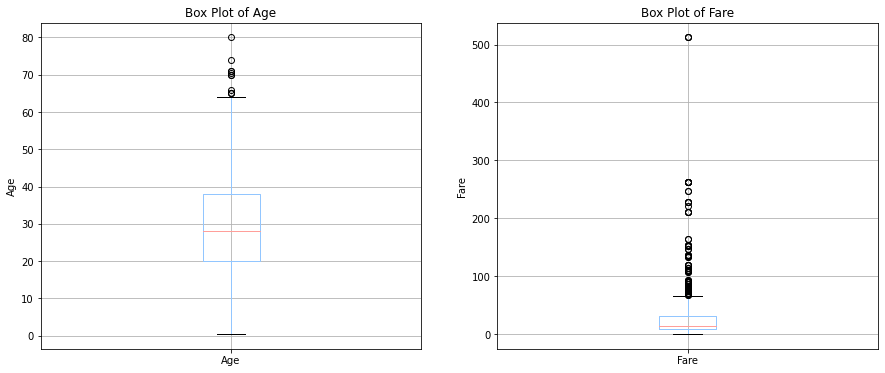

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('Box Plot of Age')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('Box Plot of Fare')
fig.set_ylabel('Fare')

##### ___SCATTER PLOT___

A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

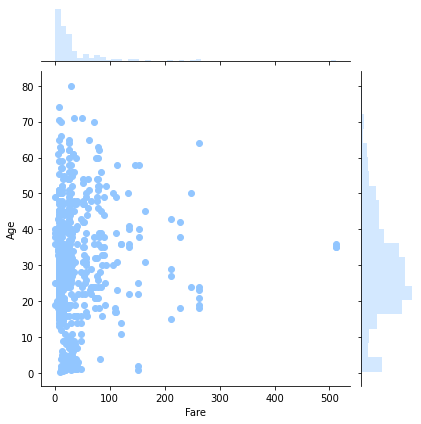

In [16]:
sns.jointplot('Fare','Age', data)

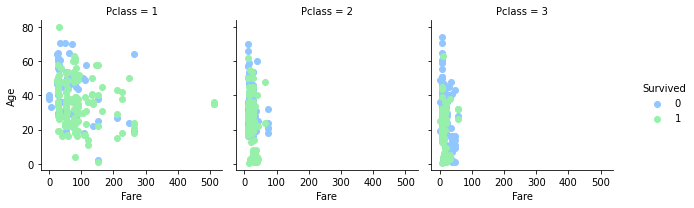

In [17]:
g = sns.FacetGrid(data, hue="Survived", col="Pclass", margin_titles=True)
g=g.map(plt.scatter, "Fare", "Age").add_legend();

##### ___Z-SCORE ANALYSIS___
This method assumes that the variable has a Gaussian distribution. The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

Here, we normally define outliers as points whose modulus of z-score is greater than a threshold value. This threshold value is usually greater than 2 (3 is a common value).

Text(0.5, 0, 'Fare')

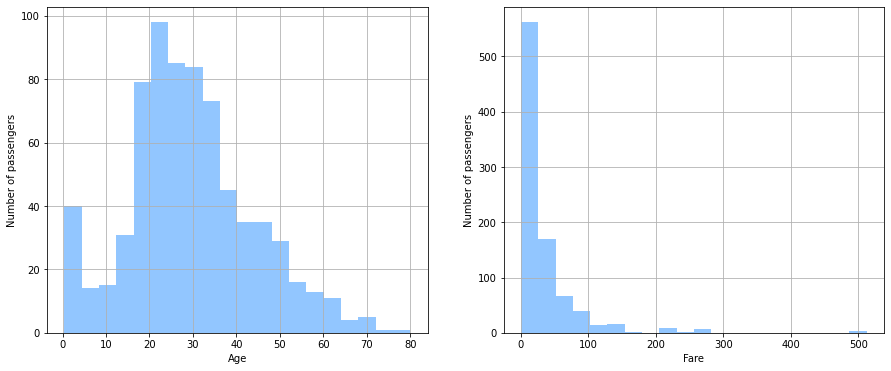

In [18]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [0]:
def outlier_zscore(data):
  threshold = 3
  mean_data = np.mean(data)
  print('Mean:', mean_data)
  std_data = np.std(data)
  print('Standard Dev:', std_data)
   
  z_scores = [(x-mean_data)/std_data for x in data]
  return np.where(np.abs(z_scores) > threshold)

In [20]:
outlier_zscore(data['Fare'])

Mean: 32.2042079685746
Standard Dev: 49.66553444477411


(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779]),)

--or--

In [21]:
from scipy import stats
np.where(stats.zscore(data['Fare'])>3)

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779]),)

##### _**IQR ANALYSIS**_

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

`IQR = 75th quantile - 25th quantile`

An outlier will sit outside the following upper and lower boundaries:

```
Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)
```

or for extreme cases:

```
Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)
```

In [0]:
def outlier_IQR(data):
  Q1, Q3 = np.percentile(data,[25,75])
  IQR = Q3-Q1
  LowerBound = Q1 - (1.5*IQR)
  UpperBound = Q3 + (1.5*IQR)
  return np.where((data>UpperBound) | (data<LowerBound))

In [23]:
outlier_IQR(data['Fare'])

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)

In [0]:
def outlier_IQR_extreme(data):
  Q1, Q3 = np.percentile(data,[25,75])
  IQR = Q3-Q1
  LowerBound = Q1 - (3*IQR)
  UpperBound = Q3 + (3*IQR)
  return np.where((data>UpperBound) | (data<LowerBound))

In [25]:
outlier_IQR_extreme(data['Fare'])

(array([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306,
        307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390,
        393, 435, 438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659,
        660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802,
        856]),)

#### ___UNIVARIATE OUTLIER DETECTION - NON-PARAMETRIC___

##### ___ISOLATION TREES___

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

___Novelties___: Many times we’re dealing with novelties (Novelty detection is a statistical method used to determine new or unknown data and determining if these new data are within the norm (inlier) or outside of it (outlier). A novel in this case means unusual, data that are new and doe not occur regularly or are simply different from the others), and the problem is often called supervised anomaly detection (Isolation Trees) and OneClassSVM for Unsupervised detection. In this case, the goal is not to remove outliers or reduce their impact, but we are interested in detecting anomalies in new observations.

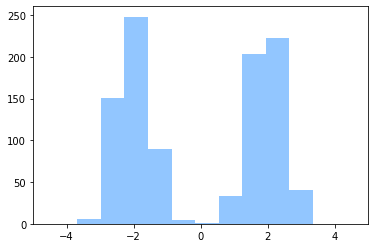

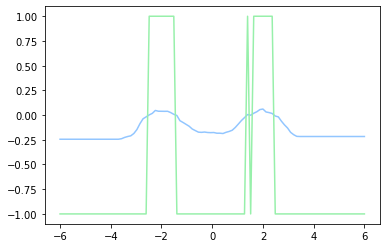

In [26]:
from sklearn.ensemble import IsolationForest

x = np.concatenate((np.random.normal(loc=-2, scale=.5,size=500), 
                    np.random.normal(loc=2, scale=.5, size=500)))
plt.hist(x)
plt.xlim([-5, 5])
plt.show()

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(x.reshape(-1, 1))

# New Points
xx = np.linspace(-6, 6, 100).reshape(-1,1)

anomaly_score = isolation_forest.decision_function(xx)
#print(anomaly_score)

outlier = isolation_forest.predict(xx)
#print(outlier) # -1 are outliers

plt.plot(xx, anomaly_score, label='anomaly score')
plt.plot(xx,outlier)

plt.show()

#### ___MULTIVARIATE OUTLIER DETECTION - PARAMETRIC___

##### ___ELLIPTIC ENVELOPE___

The Elliptic Envelope method fits a multivariate gaussian distribution to the dataset. Use the contamination hyperparameter to specify the percentage of observations the algorithm will assign as outliers.

#### ___MULTIVARIATE OUTLIER DETECTION - NON-PARAMETRIC___

##### ___DBSCAN CLUSTERING___

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.

The method, step-by-step:
1. Randomly select a point not already assigned to a cluster or designated as an outlier. Determine if it’s a core point by seeing if there are at least min_samples points around it within epsilon distance.
2. Create a cluster of this core point and all points within epsilon distance of it (all directly reachable points).
3. Find all points that are within epsilon distance of each point in the cluster and add them to the cluster. Find all points that are within epsilon distance of all newly added points and add these to the cluster. Rinse and repeat. (i.e. perform “neighborhood jumps” to find all density-reachable points and add them to the cluster).

Implementation Considerations:
1. You may need to standardize / scale / normalize your data first.
2. Be mindful of data type and the distance measure. I’ve read that the gower distance metric can be used for mixed data types. I’ve implemented Euclidean, here, which needs continuous variables, so I removed gender.
3. You will want to optimize epsilon and min_samples.

##### ___LOCAL OUTLIER FACTOR___

Unsupervised Outlier Detection using Local Outlier Factor (LOF)

LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.

This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.

A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.

The method, step-by-step:

For each point P, do the following:

1. Calculate distances between P and every other point (manhattan = |x1-x2| + |y1-y2|) = dist(p1,p2)
2. Find the Kth closest point (Kth nearest neighbor’s distance=K-Dist(P))
3. Find the K closest points (those whose distances are smaller than the Kth point), the K-distance neighborhood of P, Nk(P).
4. Find its density (Local Reachability Density= LRDk(p) — a measure of how close its neighbors are to it), basically the inverse of the avg distance between point p and its neighbors. The lower the density, the farther p is from its neighbors.
5. Find its local outlier factor, LOFk(p), as sum(reachability distances of neighbors to P) x sum(densities of neighbors). LOFk(P) is basically the sum of the distances between P and its neighboring points, weighted by the sum those points’ densities (how far they are from their k neighboring points).

Scenarios affecting LOF values:
Higher LOF values indicate a greater anomaly level and that

LOFk(p) = sum(reachability distances of its neighbors to P) x sum(neighbor densities)

The LOF for a point P will have a:
* High value if → P is far from its neighbors and its neighbors have high densities (are close to their neighbors) (LOF = (high distance sum) x (high density sum) = High value)
* Less high value if -> P is far from its neighbors, but its neighbors have low densities (LOF = (high sum) x (low sum) = middle value)
* Less high value if -> P is close to its neighbors and its neighbors have low densities (LOF = (low sum) x (low sum) = low value )

Adjusting K:

* Increase K too much and you’re just looking for outliers with respect to the entire dataset, so points far away from the highest density regions could be misclassified as outliers, even though they themselves reside in a cluster of points.
* Reduce K too much and you’re looking for outliers with respect to very small local regions of points. This could also lead to the misclassification as outliers.

___Source___: https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf

## ___TREATING AN OUTLIER___

There are a few techniques for outlier handling:

1. Outlier removal
2. Treating outliers as missing values
3. Top / Bottom / Zero Coding / Winsorizing / Outlier Capping
4. Discretisation / Binning
5. Transformation (Log-Scale)
6. Treating outliers as separate


##### ___Outlier Removal___

Outlier removal refers to removing outlier observations from the dataset. Outliers, by nature are not abundant, so this procedure should not distort the dataset dramatically. But if there are outliers across multiple variables, we may end up removing a big portion of the dataset.

#### ___Treating Outliers as Missing Values___

We can treat outliers as missing information, and carry on any of the imputation methods described.

1. Complete Case Analysis
2. Mean / Median / Mode Imputation
3. Random Sample Imputation
4. Replacement by Arbitrary Value
5. End of Distribution Imputation
6. Missing Value Indicator

#### ___Top / Bottom / Zero Coding / Winsorizing / Outlier Capping___

Top or bottom coding are also known as Winsorisation or outlier capping. The procedure involves capping the maximum and minimum values at a predefined value. This predefined value can be arbitrary, or it can be derived from the variable distribution.

If the variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus 3 times the standard deviation. If the variable is skewed, we can use the inter-quantile range proximity rule or cap at the top and bottom percentiles.

In [32]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
np.percentile(data['Fare'],[10,90]) # 10 Percentile is Bottom and 90 Percentile is Top

array([ 7.55  , 77.9583])

In [42]:
from scipy import stats

data['NewFare'] = stats.mstats.winsorize(data['Fare'],limits = [0.1,0.1])
data['NewFare'].describe()

count    891.000000
mean      25.649004
std       23.383339
min        7.550000
25%        7.910400
50%       14.454200
75%       31.000000
max       77.958300
Name: NewFare, dtype: float64

#### ___Discretisation___

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values.

Discretisation helps handle outliers and highly skewed variables.

Discretisation helps handle outliers by placing these values into the lower or higher intervals together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.

There are several approaches to transform continuous variables into discrete ones. This process is also known as binning, with each bin being each interval.

Discretisation refers to sorting the values of the variable into bins or intervals, also called buckets. There are multiple ways to discretise variables:

1. Equal width discretisation
2. Equal Frequency discretisation

```
cut command creates equispaced bins but frequency of samples is unequal in each bin.
qcut command creates unequal size bins but frequency of samples is equal in each bin
```
3. Domain knowledge discretisation
4. Discretisation using decision trees


##### ___Equal Width___

Equal width binning divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable.

width = (max value - min value) / N

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

There is no rule of thumb to define N. Typically, we would not want more than 10.



In [64]:
x = np.array([24,  7,  2, 25, 22, 29])
pd.cut(x, bins = 3, labels = ["bad", "medium", "good"]).value_counts() 

bad       2
medium    0
good      4
dtype: int64

##### ___Equal Frequency___

Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

Equal frequency discretisation using quantiles consists of dividing the continuous variable into N quantiles, N to be defined by the user. There is no rule of thumb to define N. However, if we think of the discrete variable as a categorical variable, where each bin is a category, we would like to keep N (the number of categories) low (typically no more than 10).

In [65]:
pd.qcut(x, q = 3, labels = ["bad", "medium", "good"]).value_counts()

bad       2
medium    2
good      2
dtype: int64

##### ___Discretisation with Decision Trees___

Discretisation with Decision Trees consists of using a decision tree to identify the optimal splitting points that would determine the bins or contiguous intervals:

Step 1: First it trains a decision tree of limited depth (2, 3 or 4) using the variable we want to discretize to predict the target.

Step 2: The original variable values are then replaced by the probability returned by the tree. The probability is the same for all the observations within a single bin, thus replacing by the probability is equivalent to grouping the observations within the cut-off decided by the decision tree.

Advantages :

The probabilistic predictions returned decision tree are monotonically related to the target.

The new bins show decreased entropy, this is the observations within each bucket/bin are more similar to themselves than to those of other buckets/bins.

The tree finds the bins automatically.

Disadvantages :

It may cause over-fitting

More importantly, some tuning of tree parameters might need to be done to obtain the optimal splits (e.g., depth, the minimum number of samples in one partition, the maximum number of 
partitions, and a minimum information gain). This it can be time-consuming.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data['Age'].fillna(80, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare', 'Survived']],data.Survived , test_size = 0.3, random_state = 44)

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)
X_train['Age_tree']=tree_model.predict_proba(X_train.Age.to_frame())[:,1] 
X_train.Age_tree.unique()

array([0.3986637 , 0.27083333, 0.61538462, 1.        ])

Text(0, 0.5, 'Survived')

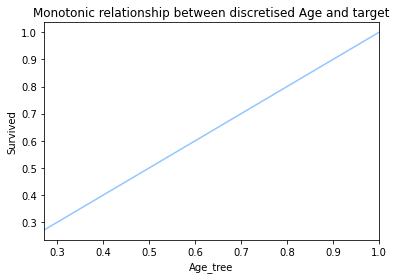

In [90]:
fig = plt.figure()
fig = X_train.groupby(['Age_tree'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

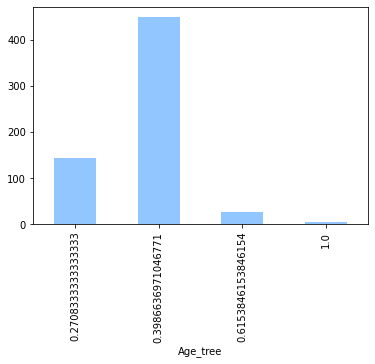

In [91]:
X_train.groupby(['Age_tree'])['Survived'].count().plot.bar()

In [92]:
pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.270833,61.00,80.00
0.398664,6.00,60.00
0.615385,1.00,5.00
1.000000,0.42,0.92


In [94]:
# finding the best number of Bins
from sklearn.model_selection import cross_val_score

score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, X_train.Age.to_frame(), y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.505994     0.004267
1      2      0.549198     0.021338
2      3      0.549512     0.023802
3      4      0.557634     0.020226


#### ___Transformation (More Details in different notebook)___

Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values when the data is right skewed. Though, the Log transformation cannot be applied negative values.



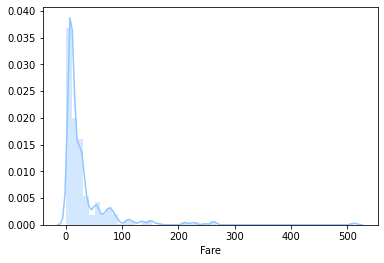

In [61]:
sns.distplot(data['Fare'])

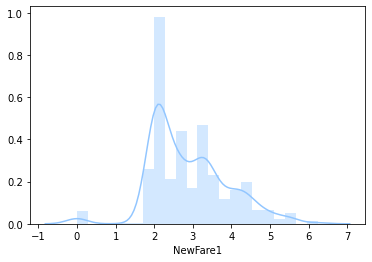

In [63]:
data['NewFare1'] = np.where(data['Fare']==0,1,data['Fare'])
sns.distplot(np.log(data['NewFare1']))

#### ___Treat Separately___

If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.